In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML
from IPython.display import display, Math
from statsmodels.graphics.tsaplots import plot_pacf

np.random.seed(42)
T = 150
t = np.arange(T)

# Predictors
x1 = np.random.normal(0, 1, T)
x2 = np.random.normal(0, 1, T)

# True coefficients
intercept = 5.0
beta1, beta2 = 2.0, -1.5
beta3, beta4, beta5 = 3.0, 1.2, -0.8
delta = 0.4  # time trend

# Generate y
y = (
    intercept + beta1 * x1 + beta2 * x2 + beta3 * x1 * x2 +
    beta4 * x1**2 + beta5 * x2**2 + delta * t +
    np.random.normal(0, 1, T)
)

# Create DataFrame
df = pd.DataFrame({'t': t, 'x1': x1, 'x2': x2, 'y': y})
df['x1_x2'] = df['x1'] * df['x2']
df['x1_sq'] = df['x1']**2
df['x2_sq'] = df['x2']**2

# Differences
df_diff = df.diff().dropna()
df_diff['interaction'] = (
    df['x1'].iloc[1:].values * df['x2'].iloc[1:].values -
    df['x1'].shift(1).iloc[1:].values * df['x2'].shift(1).iloc[1:].values
)

df_diff['x1_sq_diff'] = (
    df['x1'].iloc[1:].values**2 - df['x1'].shift(1).iloc[1:].values**2
)

df_diff['x2_sq_diff'] = (
    df['x2'].iloc[1:].values**2 - df['x2'].shift(1).iloc[1:].values**2
)




In [163]:
df.head(10)

,t,x1,x2,y,x1_x2,x1_sq,x2_sq
0,0,0.497,0.250,5.408,0.124,0.247,0.063
1,1,-0.138,0.346,3.827,-0.048,0.019,0.120
2,2,0.648,-0.680,7.675,-0.440,0.420,0.462
3,3,1.523,0.232,13.310,0.354,2.320,0.054
4,4,-0.234,0.293,5.462,-0.069,0.055,0.086
5,5,-0.234,-0.714,7.880,0.167,0.055,0.510
6,6,1.579,1.866,18.085,2.946,2.494,3.481
7,7,0.767,0.474,9.651,0.364,0.589,0.225
8,8,-0.469,-1.191,10.402,0.559,0.220,1.419
9,9,0.543,0.657,9.575,0.356,0.294,0.431


In [164]:
# Models
model_level_lin_no_t = LinearRegression().fit(df[['x1', 'x2']], df['y'])
model_level = LinearRegression().fit(df[['x1', 'x2', 'x1_x2', 'x1_sq', 'x2_sq', 't']], df['y'])
model_level_no_t = LinearRegression().fit(df[['x1', 'x2', 'x1_x2', 'x1_sq', 'x2_sq']], df['y'])
model_diff_lin = LinearRegression().fit(df_diff[['x1', 'x2']], df_diff['y'])
model_diff_nl = LinearRegression().fit(df_diff[['x1', 'x2', 'interaction', 'x1_sq_diff', 'x2_sq_diff']], df_diff['y'])

# Coefficients
print
print("Linear model (no time):\n", model_level_lin_no_t.coef_)
print("\nLevel Model (no time) Coefficients:\n", model_level_no_t.coef_)
print("Non linear model with time Coefficients:\n", model_level.coef_)
print("\nDifference Model (linear) Coefficients:\n", model_diff_lin.coef_)
print("\nDifference Model (nonlinear) Coefficients:\n", model_diff_nl.coef_)

Linear model (no time):
 [ 2.02828033 -2.64597719]

Level Model (no time) Coefficients:
 [ 2.5330505  -2.52395169  1.94287641  1.70634326 -0.35672324]
Non linear model with time Coefficients:
 [ 1.97246722 -1.43919576  2.8993799   1.28804683 -0.8096937   0.39815458]

Difference Model (linear) Coefficients:
 [ 1.08617751 -1.28648763]

Difference Model (nonlinear) Coefficients:
 [ 1.93641306 -1.41201963  2.9349989   1.25216181 -0.87872543]


In [165]:
model_level.intercept_

5.114820429411164

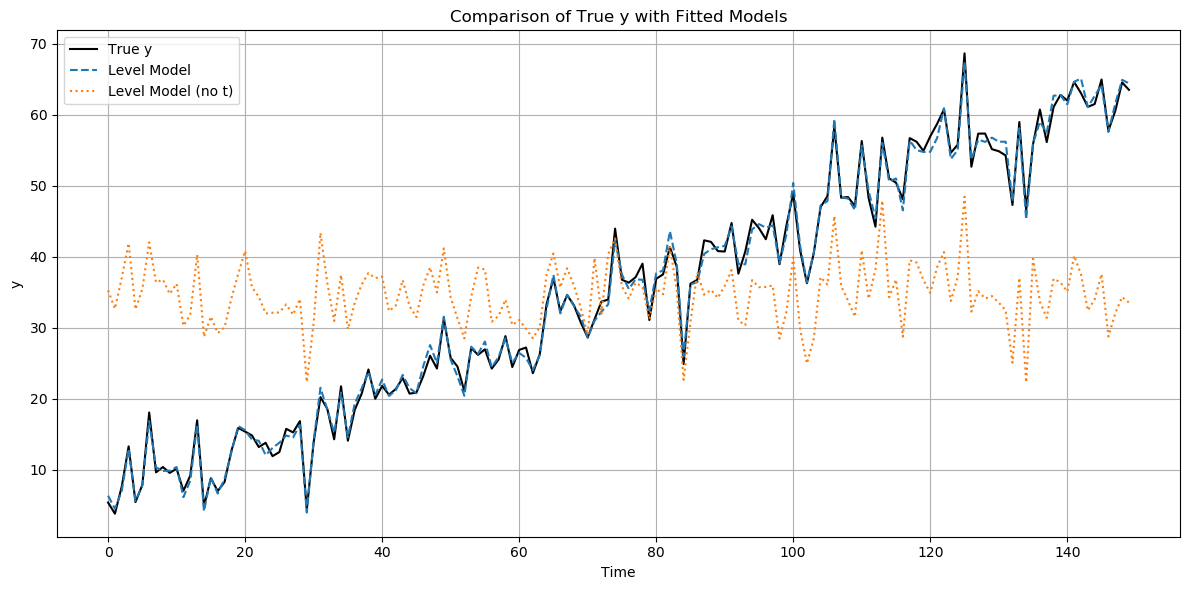

In [166]:
plt.figure(figsize=(12, 6))
plt.plot(t, y, label="True y", color="black")
plt.plot(t, model_level.predict(df[['x1', 'x2', 'x1_x2', 'x1_sq', 'x2_sq', 't']]), label="Level Model", linestyle='--')
plt.plot(t, model_level_no_t.predict(df[['x1', 'x2', 'x1_x2', 'x1_sq', 'x2_sq']]), label="Level Model (no t)", linestyle=':')
plt.xlabel("Time")
plt.ylabel("y")
plt.title("Comparison of True y with Fitted Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [167]:
# Construct coefficient table
coef_table = pd.DataFrame({
    'True Coef': [intercept, beta1, beta2, beta3, beta4, beta5, delta],
    'Lin model (no t)': [model_level_lin_no_t.intercept_]+list(model_level_lin_no_t.coef_) + 4*[np.nan],
    'Non-lin model (no t)': [model_level_lin_no_t.intercept_]+list(model_level_no_t.coef_) + [np.nan],
    'Non-lin model (with t)': [model_level.intercept_]+list(model_level.coef_),
}, index=['intercept', 'x1', 'x2', 'x1*x2', 'x1^2', 'x2^2', 'time'])

# Display

# pd.set_option('display.float_format', '{:.2f}'.format)
# pd.set_option('display.width', None)
# pd.set_option('display.max_columns', None)
# print(coef_table)

In [168]:
from IPython.display import display, HTML

# Optional: round the values for better display
coef_table_rounded = coef_table.round(3)

# Display as styled HTML table
display(HTML(coef_table_rounded.to_html()))

,True Coef,Lin model (no t),Non-lin model (no t),Non-lin model (with t)
intercept,5.000,35.086,35.086,5.115
x1,2.000,2.028,2.533,1.972
x2,-1.500,-2.646,-2.524,-1.439
x1*x2,3.000,NaN,1.943,2.899
x1^2,1.200,NaN,1.706,1.288
x2^2,-0.800,NaN,-0.357,-0.810
time,0.400,NaN,NaN,0.398


In [169]:
# Construct coefficient table
coef_table = pd.DataFrame({
    'True Coef': [intercept, beta1, beta2, beta3, beta4, beta5, delta],
    'Diff (linear only)': [model_diff_lin.intercept_] + list(model_diff_lin.coef_) + [np.nan] * 4,
    'Diff (nonlinear)': [model_diff_nl.intercept_] + list(model_diff_nl.coef_) + [np.nan] * (6 - len(model_diff_nl.coef_))
}, index=['intercept','Δx1', 'Δx2', 'Δ(x1*x2)', 'Δ(x1^2)', 'Δ(x2^2)', 'time'])

# Display
pd.set_option('display.float_format', '{:.3f}'.format)
print(coef_table)

           True Coef  Diff (linear only)  Diff (nonlinear)
intercept      5.000               0.395             0.398
Δx1            2.000               1.086             1.936
Δx2           -1.500              -1.286            -1.412
Δ(x1*x2)       3.000                 NaN             2.935
Δ(x1^2)        1.200                 NaN             1.252
Δ(x2^2)       -0.800                 NaN            -0.879
time           0.400                 NaN               NaN


In [170]:
from IPython.display import display, HTML

# Optional: round the values for better display
coef_table_rounded = coef_table.round(3)

# Display as styled HTML table
display(HTML(coef_table_rounded.to_html()))

,True Coef,Diff (linear only),Diff (nonlinear)
intercept,5.000,0.395,0.398
Δx1,2.000,1.086,1.936
Δx2,-1.500,-1.286,-1.412
Δ(x1*x2),3.000,NaN,2.935
Δ(x1^2),1.200,NaN,1.252
Δ(x2^2),-0.800,NaN,-0.879
time,0.400,NaN,NaN


In [216]:
from IPython.display import display, Math

# Forward Difference Model
display(Math(r"""
\Delta^{\text{forward}} y_t = y_{t+1} - y_t = 
\beta_1 (x_{1,t+1} - x_{1,t}) + 
\beta_2 (x_{2,t+1} - x_{2,t}) + 
\beta_3 (x_{1,t+1}x_{2,t+1} - x_{1,t}x_{2,t}) + 
\beta_4 (x_{1,t+1}^2 - x_{1,t}^2) + 
\beta_5 (x_{2,t+1}^2 - x_{2,t}^2) + \delta + \varepsilon_t
"""))

# Backward Difference Model
display(Math(r"""
\Delta^{\text{backward}} y_t = y_t - y_{t-1} = 
\beta_1 (x_{1,t} - x_{1,t-1}) + 
\beta_2 (x_{2,t} - x_{2,t-1}) + 
\beta_3 (x_{1,t}x_{2,t} - x_{1,t-1}x_{2,t-1}) + 
\beta_4 (x_{1,t}^2 - x_{1,t-1}^2) + 
\beta_5 (x_{2,t}^2 - x_{2,t-1}^2) + \delta + \varepsilon_t
"""))

# Centered Difference Model
display(Math(r"""
\Delta^{\text{centered}} y_t = y_{t+1} - y_{t-1} = 
\beta_1 (x_{1,t+1} - x_{1,t-1}) + 
\beta_2 (x_{2,t+1} - x_{2,t-1}) + 
\beta_3 (x_{1,t+1}x_{2,t+1} - x_{1,t-1}x_{2,t-1}) + 
\beta_4 (x_{1,t+1}^2 - x_{1,t-1}^2) + 
\beta_5 (x_{2,t+1}^2 - x_{2,t-1}^2) + 2\delta + \varepsilon_t
"""))

# Smoothed Centered Difference Model
display(Math(r"""
\Delta^{\text{smooth}} y_t = \frac{1}{2}[(y_{t+2} - y_{t-2}) + (y_{t+1} - y_{t-1})] = 
\beta_1 \Delta^{\text{smooth}} x_{1,t} + 
\beta_2 \Delta^{\text{smooth}} x_{2,t} + 
\beta_3 \Delta^{\text{smooth}} (x_1 x_2)_t + 
\beta_4 \Delta^{\text{smooth}} (x_1^2)_t + 
\beta_5 \Delta^{\text{smooth}} (x_2^2)_t + 2\delta + \varepsilon_t
"""))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [206]:
import numpy as np
import pandas as pd

# Seed and data generation
np.random.seed(42)
T = 100
t = np.arange(T)
x1 = np.random.normal(0, 1, T)
x2 = np.random.normal(0, 1, T)

# True coefficients
intercept = 5.0
beta1, beta2 = 2.0, -1.5
beta3, beta4, beta5 = 3.0, 1.2, -0.8
delta = 0.4
phi = 0.6

# Generate target variable y

autoregressive = True

if autoregressive == False:
    y = (
        intercept + beta1 * x1 + beta2 * x2 + beta3 * x1 * x2 +
        beta4 * x1**2 + beta5 * x2**2 + delta * t +
        np.random.normal(0, 1, T)
    )

else:
    # Generate autoregressive y
    y = np.zeros(T)
    eps = np.random.normal(0, 1, T)
    y[0] = (
        intercept + beta1 * x1[0] + beta2 * x2[0] + beta3 * x1[0] * x2[0] +
        beta4 * x1[0]**2 + beta5 * x2[0]**2 + delta * t[0] + eps[0]
    )
    for i in range(1, T):
        y[i] = (
            intercept + beta1 * x1[i] + beta2 * x2[i] + beta3 * x1[i] * x2[i] +
            beta4 * x1[i]**2 + beta5 * x2[i]**2 + delta * t[i] +
            phi * y[i - 1] + eps[i]
    )
# Original DataFrame
df = pd.DataFrame({'t': t, 'x1': x1, 'x2': x2, 'y': y})


# Backward differencing
df['delta_y_backward'] = df['y'] - df['y'].shift(1)
df['delta_x1_backward'] = df['x1'] - df['x1'].shift(1)
df['delta_x2_backward'] = df['x2'] - df['x2'].shift(1)


df['delta_interaction_backward'] = (
    df['x1'] * df['x2'] - df['x1'].shift(1) * df['x2'].shift(1)
)

df['delta_x1_sq_backward'] = df['x1']**2 - df['x1'].shift(1)**2
df['delta_x2_sq_backward'] = df['x2']**2 - df['x2'].shift(1)**2


# Forward differencing
df['delta_y_forward'] = df['y'].shift(-1) - df['y']
df['delta_x1_forward'] = df['x1'].shift(-1) - df['x1']
df['delta_x2_forward'] = df['x2'].shift(-1) - df['x2']


df['delta_interaction_forward'] = (
    df['x1'].shift(-1) * df['x2'].shift(-1) - df['x1'] * df['x2']
)

df['delta_x1_sq_forward'] = df['x1'].shift(-1)**2 - df['x1']**2
df['delta_x2_sq_forward'] = df['x2'].shift(-1)**2 - df['x2']**2


# Centered difference
df['delta_y'] = df['y'].shift(-1) - df['y'].shift(1)
df['delta_x1'] = df['x1'].shift(-1) - df['x1'].shift(1)
df['delta_x2'] = df['x2'].shift(-1) - df['x2'].shift(1)

df['delta_interaction'] = (
    df['x1'].shift(-1) * df['x2'].shift(-1) -
    df['x1'].shift(1) * df['x2'].shift(1)
)

df['delta_x1_sq'] = df['x1'].shift(-1)**2 - df['x1'].shift(1)**2
df['delta_x2_sq'] = df['x2'].shift(-1)**2 - df['x2'].shift(1)**2


# Smoothed centered difference

df['delta_y_smooth'] = 0.5 * ((df['y'].shift(-2) - df['y'].shift(2)) + (df['y'].shift(-1) - df['y'].shift(1)))
df['delta_x1_smooth'] = 0.5 * ((df['x1'].shift(-2) - df['x1'].shift(2)) + (df['x1'].shift(-1) - df['x1'].shift(1)))
df['delta_x2_smooth'] = 0.5 * ((df['x2'].shift(-2) - df['x2'].shift(2)) + (df['x2'].shift(-1) - df['x2'].shift(1)))


interaction_forward_2 = df['x1'].shift(-2) * df['x2'].shift(-2)
interaction_backward_2 = df['x1'].shift(2) * df['x2'].shift(2)
interaction_forward_1 = df['x1'].shift(-1) * df['x2'].shift(-1)
interaction_backward_1 = df['x1'].shift(1) * df['x2'].shift(1)

df['delta_interaction_smooth'] = 0.5 * ((interaction_forward_2 - interaction_backward_2) + 
                                        (interaction_forward_1 - interaction_backward_1))

df['delta_x1_sq_smooth'] = 0.5 * ((df['x1'].shift(-2)**2 - df['x1'].shift(2)**2) + 
                                  (df['x1'].shift(-1)**2 - df['x1'].shift(1)**2))

df['delta_x2_sq_smooth'] = 0.5 * ((df['x2'].shift(-2)**2 - df['x2'].shift(2)**2) + 
                                  (df['x2'].shift(-1)**2 - df['x2'].shift(1)**2))

df_clean = df.dropna().reset_index(drop=True)

df_clean.head()

,t,x1,x2,y,delta_y_backward,delta_x1_backward,delta_x2_backward,delta_interaction_backward,delta_x1_sq_backward,delta_x2_sq_backward,delta_y_forward,delta_x1_forward,delta_x2_forward,delta_interaction_forward,delta_x1_sq_forward,delta_x2_sq_forward,delta_y,delta_x1,delta_x2,delta_interaction,delta_x1_sq,delta_x2_sq,delta_y_smooth,delta_x1_smooth,delta_x2_smooth,delta_interaction_smooth,delta_x1_sq_smooth,delta_x2_sq_smooth
0,2,0.648,-0.343,14.080,4.674,0.786,0.078,-0.280,0.400,-0.059,4.474,0.875,-0.460,-1.000,1.900,0.526,9.148,1.661,-0.382,-1.280,2.301,0.467,10.188,0.465,0.436,-0.270,1.054,-0.755
1,3,1.523,-0.802,18.554,4.474,0.875,-0.460,-1.000,1.900,0.526,-2.267,-1.757,0.641,1.260,-2.265,-0.618,2.207,-0.882,0.181,0.260,-0.365,-0.091,3.606,-0.489,0.503,0.053,-0.164,-0.053
2,4,-0.234,-0.161,16.287,-2.267,-1.757,0.641,1.260,-2.265,-0.618,-1.875,0.000,0.565,-0.132,-0.000,0.137,-4.143,-1.757,1.206,1.127,-2.265,-0.480,3.875,-0.413,1.718,2.164,-0.095,1.480
3,5,-0.234,0.404,14.411,-1.875,0.000,0.565,-0.132,-0.000,0.137,11.562,1.813,1.482,3.073,2.439,3.394,9.687,1.813,2.047,2.941,2.439,3.532,8.694,0.529,1.512,2.148,0.354,1.459
4,6,1.579,1.886,25.974,11.562,1.813,1.482,3.073,2.439,3.394,0.282,-0.812,-1.712,-2.845,-1.905,-3.527,11.844,1.002,-0.229,0.229,0.534,-0.133,9.274,0.383,0.095,0.035,0.350,-0.046


In [207]:
#model_diff_nl_backward = LinearRegression().fit(df_diff[['x1', 'x2', 'interaction', 'x1_sq_diff', 'x2_sq_diff']], df_diff['y'])

model_diff_nl_backward = LinearRegression().fit(df_clean[['delta_x1_backward', 'delta_x2_backward',
    'delta_interaction_backward', 'delta_x1_sq_backward', 'delta_x2_sq_backward']], df_clean['delta_y_backward'])

model_diff_nl_forward = LinearRegression().fit(df_clean[['delta_x1_forward', 'delta_x2_forward',
    'delta_interaction_forward', 'delta_x1_sq_forward', 'delta_x2_sq_forward']], df_clean['delta_y_forward'])

model_diff_nl_centered = LinearRegression().fit(df_clean[['delta_x1', 'delta_x2', 'delta_interaction', 'delta_x1_sq', 'delta_x2_sq']], df_clean['delta_y'])

model_diff_nl_centered_smoothed = LinearRegression().fit(df_clean[['delta_x1_smooth', 'delta_x2_smooth',
    'delta_interaction_smooth', 'delta_x1_sq_smooth', 'delta_x2_sq_smooth']], df_clean['delta_y_smooth'])

In [208]:
# Construct coefficient table
coef_table = pd.DataFrame({
    'True Coef': [intercept, beta1, beta2, beta3, beta4, beta5, delta],
    'Diff_model_backward': [model_diff_nl_backward.intercept_] + list(model_diff_nl_backward.coef_) + [np.nan] * (6 - len(model_diff_nl_backward.coef_)),
    'Diff_model_forward': [model_diff_nl_forward.intercept_] + list(model_diff_nl_forward.coef_) + [np.nan] * (6 - len(model_diff_nl_forward.coef_)),
    'Diff_model_centered': [model_diff_nl_centered.intercept_] + list(model_diff_nl_centered.coef_) + [np.nan] * (6 - len(model_diff_nl_centered.coef_)),
    'Diff_model_centered_smoothed': [model_diff_nl_centered_smoothed.intercept_] + list(model_diff_nl_centered_smoothed.coef_) + [np.nan] * (6 - len(model_diff_nl_centered.coef_)),
}, index=['intercept','Δx1', 'Δx2', 'Δ(x1*x2)', 'Δ(x1^2)', 'Δ(x2^2)', 'time'])


In [214]:
from IPython.display import display, HTML

# Optional: round the values for better display
coef_table_rounded = coef_table.round(3)

# Display as styled HTML table
display(Math(r'y_t = \alpha + \beta_1 x_{1,t} + \beta_2 x_{2,t} + \beta_3 x_{1,t} x_{2,t} + \beta_4 x_{1,t}^2 + \beta_5 x_{2,t}^2 + \delta t + \phi y_{t-1} + \varepsilon_t'))
display(HTML(coef_table_rounded.to_html()))

<IPython.core.display.Math object>

,True Coef,Diff_model_backward,Diff_model_forward,Diff_model_centered,Diff_model_centered_smoothed
intercept,5.000,1.031,1.016,2.048,3.060
Δx1,2.000,1.892,1.875,2.335,2.541
Δx2,-1.500,-1.135,-1.135,-1.191,-1.058
Δ(x1*x2),3.000,1.747,1.753,1.997,3.116
Δ(x1^2),1.200,0.824,0.817,0.855,0.594
Δ(x2^2),-0.800,-0.646,-0.643,-0.806,-1.074
time,0.400,NaN,NaN,NaN,NaN


<Figure size 1000x400 with 0 Axes>

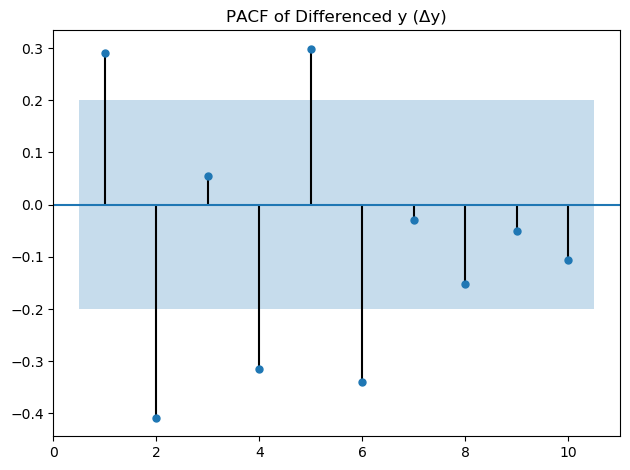

In [210]:
# Plot PACF of differenced y
plt.figure(figsize=(10, 4))
plot_pacf(df_clean['delta_y'], lags=10, method='ywmle', zero=False)
plt.title("PACF of Differenced y (Δy)")
plt.tight_layout()
plt.show()

In [213]:
from IPython.display import display, Math

In [ ]:
From Numbers to Vision: Using Generative AI to Visualize Progressive Asset Degradation
1. Importance of the Problem
Across industries, asset degradation—from mechanical wear and corrosion to fouling and fatigue—is a leading cause of performance loss, efficiency decline, and unexpected failures. While industrial systems increasingly monitor degradation using sensor data and condition indicators, these metrics are often abstract (e.g., vibration levels, resistance, pressure drop) and difficult for operators or stakeholders to intuitively interpret. This creates a communication and decision-making gap: quantitative data exists, but it lacks visual context or a tangible link to real-world degradation. Bridging this gap is crucial for improving maintenance planning, asset health visibility, and operator training.

2. How This Solution Solves the Problem
We present a rule-based, Generative AI-powered visualization framework for mapping degradation indicators over time to progressive visual representations of asset health. The solution takes as input a monotonically increasing degradation metric and normalizes it over a 0–1 scale. Based on user-defined rules, the value is classified into severity levels (e.g., healthy, mildly degraded, moderately degraded, severely degraded). Each level is linked to a representative image generated using text-to-image Generative AI tools (e.g., DALL·E) that visually simulate the degradation state.

This approach is:

Model-free (no need for labeled training data),

Highly interpretable (clear mapping from indicator to image),

Domain-flexible (applicable to a range of asset types),
and can be embedded in real-time dashboards or digital twins for visualization.

3. Use Case: Visualizing Fouling in Heat Exchangers
To demonstrate the method, we apply it to the case of heat exchanger fouling, where fouling buildup reduces heat transfer and increases pressure drop. We use a time series of a monotonically increasing fouling indicator (e.g., thermal resistance) as input. This value is mapped into five severity categories: Clean, Light, Moderate, Heavy, and Severe Fouling. Each stage is linked to a realistic image of a heat exchanger tube sheet generated using Generative AI tools, showing progressively worsening fouling.

This produces an intuitive, time-aware visualization of how the asset degrades—offering engineers and operators an immediate visual understanding of current fouling state based on a single metric